# **Regressors** 
Let's Boost Our Knowledge with Regression Problems and be Ready for All of it,


# Important Note :-
While dealing with vectors  [ 1D Array ] =  1 Feature  or 1 Label
Some functions such as fitting and transforming would require the input to be reshaped , try to just add a line  for this  when you want to reshape `X` 
you just type  :-
`X= X.reshape(-1,1)  `

# **First**   : Come and Have A look on a Comparison Between Polynomial Regression and Linear Regression
 

R squared of Linear Regression : 0.9569566641435086
R squared of Polynomial Regression : 0.9665546834956733


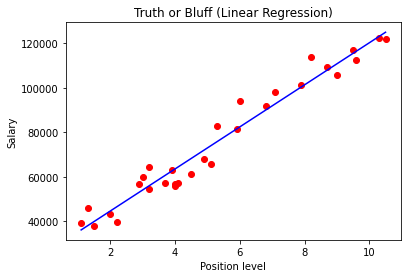

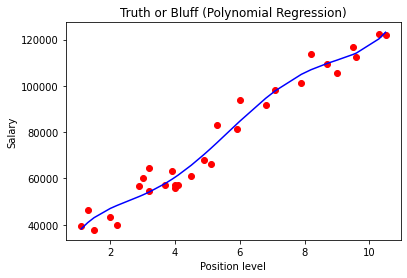

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset
df= pd.read_csv('Salary_Data.csv')
x= df.iloc[:,0].values
y=df.iloc[:,1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x=x.reshape(-1,1)
y=y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 , shuffle= False)

'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
'''

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

#Evaluation
from sklearn.metrics import r2_score
Er1=r2_score(y,lin_reg.predict(x))
Er2=r2_score(y,lin_reg_2.predict(poly_reg.fit_transform(x)))
print('R squared of Linear Regression :', Er1)
print('R squared of Polynomial Regression :', Er2)

# Visualising the Linear Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



# Explanation
Let's Explore The code of Polynomial Regression  in more Details

Polynomial Regression works by  Transforming the Current Features into Polynomial Features 
In Our Case we only have 1  Feature and we do want to convert it for example to 10 Poly Features  let's see how can we do this and how would they look like 

In [5]:
pd.DataFrame(x).head(5)  # Let's have a look on Our X
# I've Chose to visualize it as a data frame cause The Array is currently  look like [ [1.1],[1.3],[1.5],... ] which is not the best way to see

,0
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [0]:
from sklearn.preprocessing import PolynomialFeatures
#Instantiate
poly=PolynomialFeatures(degree=20) # Number of Degree is Hyperparameter so you can try it till you get the Best Results
Poly_train_X= poly.fit_transform(x)
Poly_test_X= poly.transform(x)



# What is the PolyFeatures ?

The Poly Features is a Matrix Generated from  Our Actual Features which is X_train

Poly Features Size is equal to ( Number of Rows , The Degree of the Polynomial)
The  Rows indicates the Data Rows 
The Columns indicates the Polynomial Features which is Generated from our Column

So we can tell that our Column Got Transformed into abig Matrix.



In [0]:
# Let's See Now the Poly features  of Array X 
pd.DataFrame(Poly_X).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,1.1,1.21,1.331,1.4641,1.61051,1.771561,1.948717,2.143589,2.357948,2.593742,2.853117,3.138428,3.452271,3.797498,4.177248,4.594973,5.054470,5.559917e+00,6.115909e+00,6.727500e+00
1,1.0,1.3,1.69,2.197,2.8561,3.71293,4.826809,6.274852,8.157307,10.604499,13.785849,17.921604,23.298085,30.287511,39.373764,51.185893,66.541661,86.504159,1.124554e+02,1.461920e+02,1.900496e+02
2,1.0,1.5,2.25,3.375,5.0625,7.59375,11.390625,17.085938,25.628906,38.443359,57.665039,86.497559,129.746338,194.619507,291.929260,437.893890,656.840836,985.261253,1.477892e+03,2.216838e+03,3.325257e+03
3,1.0,2.0,4.00,8.000,16.0000,32.00000,64.000000,128.000000,256.000000,512.000000,1024.000000,2048.000000,4096.000000,8192.000000,16384.000000,32768.000000,65536.000000,131072.000000,2.621440e+05,5.242880e+05,1.048576e+06
4,1.0,2.2,4.84,10.648,23.4256,51.53632,113.379904,249.435789,548.758735,1207.269218,2655.992279,5843.183014,12855.002631,28281.005788,62218.212734,136880.068015,301136.149634,662499.529195,1.457499e+06,3.206498e+06,7.054295e+06


# Explanation 
So we can tell that " Polynomial Features " Is some how a way of Transformation for the Features but thats not  a Model yet ,  you need to Build a model to get fit on this  which can be basically a linear Regression 

To fit a **Linear Regression** Model to **Normal Features** we use :-


```
LinReg.fit(X_train, y_train)
LinReg.predict(X_test)
```




and To Fit a **Linear regression** Model to **Poly features** we type it like this 

```
LinReg.fit(poly.fit_transform(X_train), y_train)
LinReg.predict(poly.transform(X_test))
```





# Regularization Techniques  
It is about Putting a Penality Term to the Model 


*   Ridge =RSS + Alpha* Squared (Slope)
*   Lasso = RSS+ Alpha *Abs(Slope)

# Ridge Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.23047e-17): result may not be accurate.
  overwrite_a=True).T


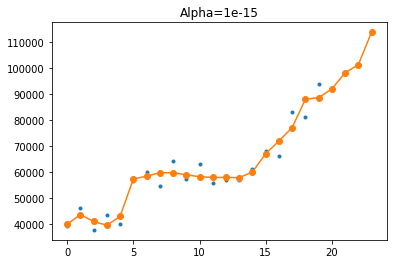

------------------


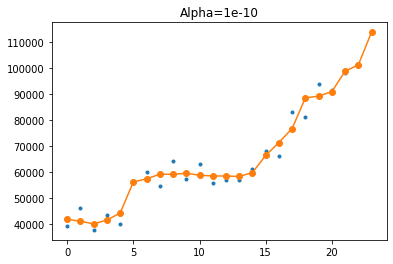

------------------


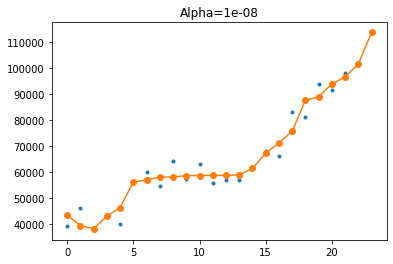

------------------


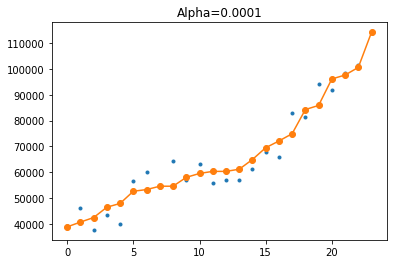

------------------


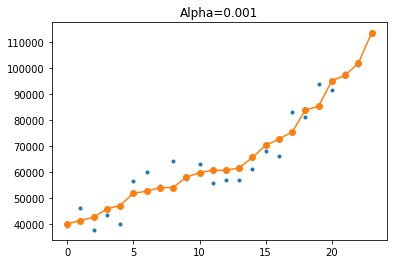

------------------


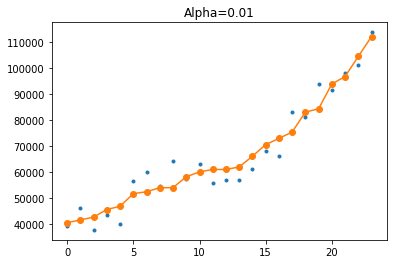

------------------


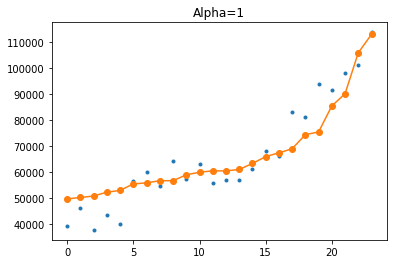

------------------


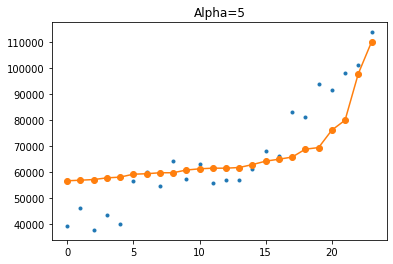

------------------


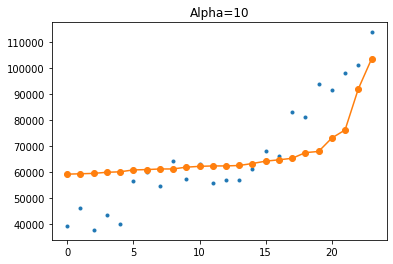

------------------


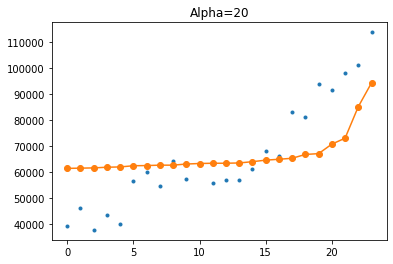

------------------


In [10]:
for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(poly.fit_transform(x_train), y_train)
    plt.title('Alpha=%s' %alpha)
    plt.plot(y_train ,'.', ridge.predict(poly.fit_transform(x_train)),'-o')
    plt.show()
    print('------------------')

# Lasso Regression 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301219845.7245679, tolerance: 1026733.8181833335
  positive)


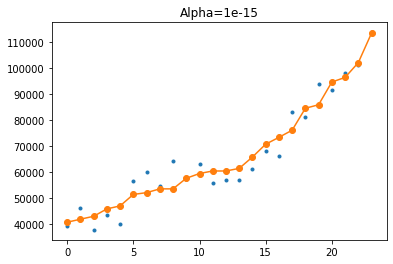

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301219845.7098346, tolerance: 1026733.8181833335
  positive)


----------------------------------------------------------


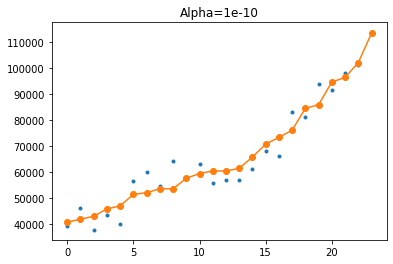

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301219844.2510651, tolerance: 1026733.8181833335
  positive)


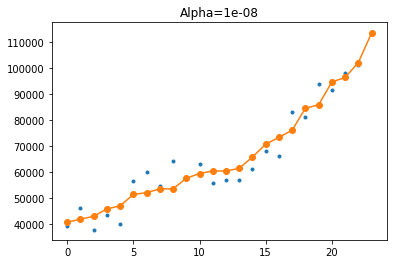

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301218372.21866643, tolerance: 1026733.8181833335
  positive)


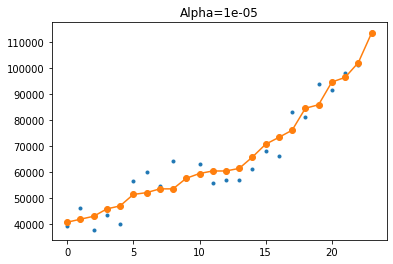

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301205110.56257385, tolerance: 1026733.8181833335
  positive)


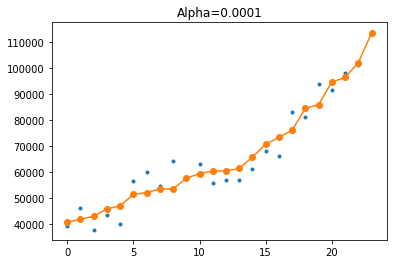

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301072477.0826097, tolerance: 1026733.8181833335
  positive)


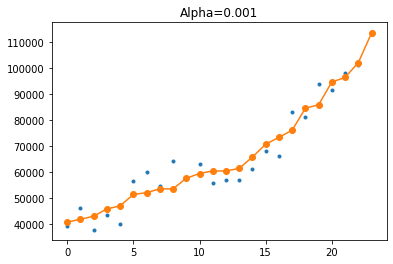

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299744489.39168763, tolerance: 1026733.8181833335
  positive)


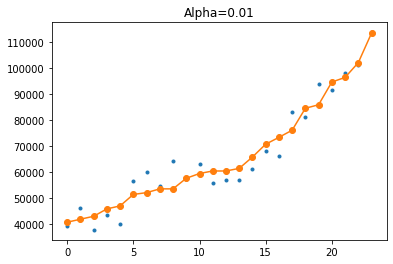

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139869737.47764617, tolerance: 1026733.8181833335
  positive)


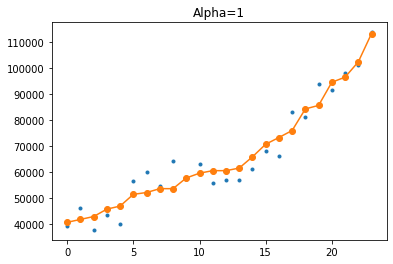

----------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317257.461212814, tolerance: 1026733.8181833335
  positive)


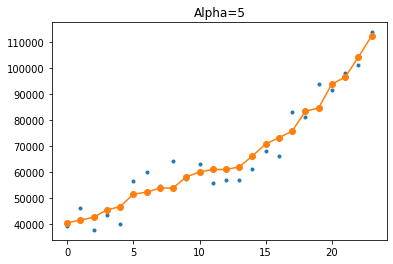

----------------------------------------------------------


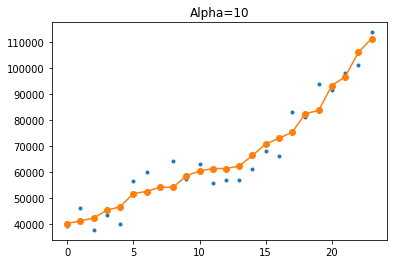

----------------------------------------------------------


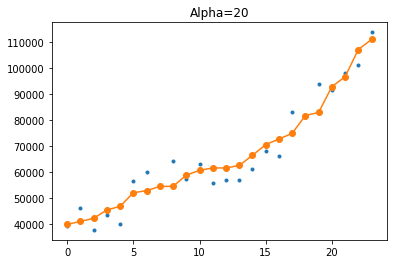

----------------------------------------------------------


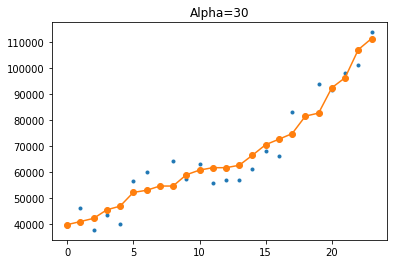

----------------------------------------------------------


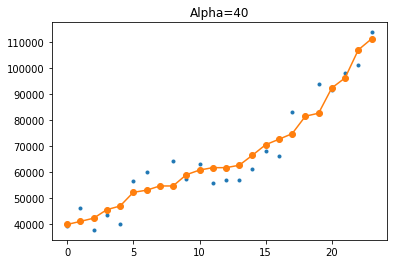

----------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,6984.043178,-747.874198,104.396552,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,-0.000019,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143168e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
1,0.0,6984.043178,-747.874198,104.396552,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,-0.000019,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143168e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
2,0.0,6984.043174,-747.874196,104.396551,13.963379,0.800985,-0.012366,-0.009784,-0.001582,-0.000189,-0.000019,-1.703482e-06,-1.279671e-07,-6.703315e-09,1.143167e-10,1.077011e-10,2.232512e-11,3.606783e-12,5.236586e-13,7.169590e-14,9.464981e-15
3,0.0,6984.039358,-747.871553,104.396169,13.963357,0.800985,-0.012365,-0.009784,-0.001582,-0.000189,-0.000019,-1.703479e-06,-1.279667e-07,-6.703339e-09,1.142626e-10,1.077018e-10,2.232520e-11,3.606792e-12,5.236596e-13,7.169602e-14,9.464995e-15
4,0.0,6984.004963,-747.847744,104.392721,13.963161,0.800989,-0.012358,-0.009784,-0.001582,-0.000189,-0.000019,-1.703454e-06,-1.279634e-07,-6.703543e-09,1.137746e-10,1.077080e-10,2.232593e-11,3.606876e-12,5.236692e-13,7.169711e-14,9.465120e-15
5,0.0,6983.660864,-747.609625,104.358249,13.961204,0.801026,-0.012290,-0.009784,-0.001582,-0.000189,-0.000019,-1.703200e-06,-1.279306e-07,-6.705536e-09,1.088879e-10,1.077705e-10,2.233319e-11,3.607712e-12,5.237650e-13,7.170803e-14,9.466362e-15
6,0.0,6980.191495,-745.223226,104.013810,13.941626,0.801377,-0.011605,-0.009792,-0.001582,-0.000189,-0.000019,-1.700670e-06,-1.276027e-07,-6.718736e-09,5.920111e-11,1.083965e-10,2.240601e-11,3.616104e-12,5.247262e-13,7.181770e-14,9.478847e-15
7,0.0,6108.354321,-395.019318,73.003491,11.767642,0.636427,0.006542,-0.003142,-0.001693,-0.000190,-0.000018,-1.490164e-06,-9.416897e-08,-2.350827e-09,-0.000000e+00,-0.000000e+00,-0.000000e+00,4.396276e-13,6.750169e-13,8.981593e-14,1.162322e-14
8,0.0,4359.934867,181.616722,71.266501,2.962330,0.000000,0.000000,-0.000000,-0.000000,-0.000127,-0.000018,-9.445640e-07,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.745627e-14
9,0.0,3495.175502,669.670930,18.233379,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000014,-2.102417e-09,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.068273e-15


In [13]:
coeff_matrix = []
for alpha in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = alpha, normalize=True)
    lasso.fit(poly.fit_transform(x_train), y_train)
    coeff_matrix.append(lasso.coef_)
    plt.title('Alpha=%s'%alpha)  # Do YOU REMEMBER THIS SYNTAX  :D
    plt.plot(y_train ,'.', lasso.predict(poly.fit_transform(x_train)),'-o'  )
    plt.show()
    print('----------------------------------------------------------')
pd.DataFrame(coeff_matrix)

# Let's Say you 've Liked Alpha =1 for Lasso For Example Let's See how to select it and use it 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139869737.47764617, tolerance: 1026733.8181833335
  positive)


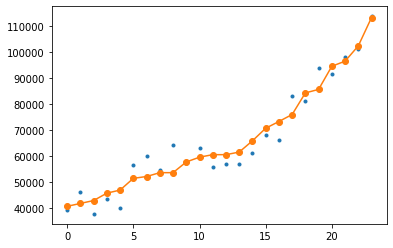

In [16]:
# Select Best  Alpha
lasso = Lasso(alpha = 1, normalize=True)
lasso.fit(poly.fit_transform(x_train),y_train)
plt.plot(y_train, '.',lasso.predict(poly.fit_transform(x_train)),'-o')
plt.show()

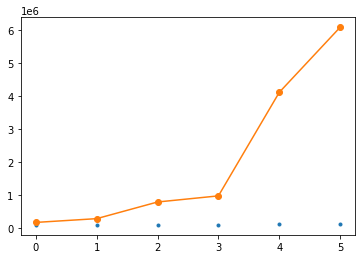

In [17]:
plt.plot(y_test, '.',lasso.predict(poly.transform(x_test)),'-o')

In [0]:
#You can always check the performance of the whole Model by using R Squared 
lasso.fit(poly.fit_transform(X),y)
preds=lasso.predict(poly.fit_transform(X))
R2=r2_score(y,preds)
R2

# **DO NOT**  COPY AND PASTE ANYTHING 
# **TYPE WITH YOUR OWN FINGERS**
you are always allowed to have a look up to remember the Syntax 


I Do Really Enourage you to Restart Kernel  and not Run anything from the Above Cells  so no variables would be taken already or hold a false value
 

### Goal of this Task  is to  Use all The Regression Models we 've learnt so  far  but in a way that make us Get the Best of Everything.

Feel Free to use any Data file or You can use `Salary Data`  No worries , it will work with all 


Try to  Follow the Steps !

**First** : If You are on Colab Right now  Get your Authentication Key

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
import os 
os.chdir('drive/My Drive')  # Fix This if your file is in a Certain Directory in Your Drive

**Second** : 


1.   Load The Data File 
2.   Split Features and Labels
3.   Reshape Features for later Usage 





In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
dfsl=pd.read_csv('Salary_Data.csv')
dfsl

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [0]:
x= dfsl.values[:,0]
y= dfsl.values[:,1]
x= x.reshape(-1,1)
y= y.reshape(-1,1)

**Third** : 


1.   Split training and Testing Data
2.   Stop the shuffle  for a good Visualization
3.   Fix the Seed to a Constant Number 





In [0]:
from  sklearn.model_selection  import train_test_split 
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=False)

**Forth** : 


1.   Instantiate The Linear Regression Model
2.   Fit the Model to Training Set
3.   Predict The Testing Set 
4.   Evaluate the Model by  R squared method between Preds and Actual Values
5.   Visualize The Model in a Good way 

In [21]:
from sklearn.linear_model import LinearRegression
lgs=LinearRegression()
lgs.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred=lgs.predict(x)

In [23]:
from sklearn.metrics import r2_score
ersl=r2_score(y,pred)
ersl

0.9569566641435086

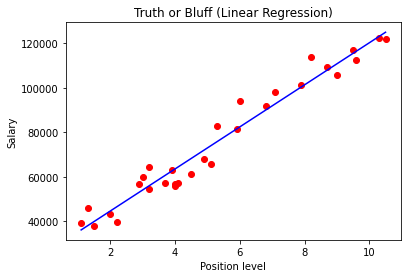

In [24]:
plt.scatter(x, y, color = 'red')
plt.plot(x, pred, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Fifth** : 


1.   Instantiate The Poly Features with  Degree = 7
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Linear Regression Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way 











In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=7)
x_poly= poly.fit_transform(x)

In [26]:
poly_lgs1=LinearRegression()
poly_lgs1.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_poly_pred = poly_lgs1.predict(x_poly)

In [28]:
ersl_poly=r2_score(y,y_poly_pred)
ersl_poly

0.9722578921026591

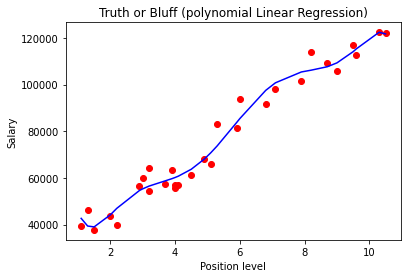

In [29]:
plt.scatter(x, y, color = 'red')
plt.plot(x, y_poly_pred, color = 'blue')
plt.title('Truth or Bluff (polynomial Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Sixth**: Make The Fifth Step more Powerful!


Build a Code that Try 20 Degrees like from  Degree 1 to 21
And Return The Best Degree with the Highest R Squared Value 

In [0]:
 dfsl=pd.read_csv('Salary_Data.csv')
 dfsl
 x= dfsl.values[:,0]
 y= dfsl.values[:,1]
 x= x.reshape(-1,1)
 y= y.reshape(-1,1)

In [31]:
y.shape

(30, 1)

In [0]:
def slct_bst_dgree(x_sample,y_sample,degrees,x_test):
  #import dependencies
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import sklearn 
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import r2_score
  #intiate variables
  global dgres_r2
  dgres_r2={}
  global int_degree
  int_degree=1
  #while loop
  while int_degree <= degrees:
    poly = PolynomialFeatures(degree = int_degree)
    x_poly= poly.fit_transform(x_sample)
    x_test_poly= poly.transform(x_test)

    poly_lgs =LinearRegression()
    poly_lgs.fit(x_poly,y_sample)
    y_poly_pred = poly_lgs.predict(x_test_poly)
    
    r2score = r2_score(y_sample,y_poly_pred)
    #assign r2score as a key and its degree as a value
    dgres_r2[r2score]=int_degree
    #increase the number of degrees as the itrator work!
    int_degree +=1
    #end of loop
  bst_r2scr = max(dgres_r2.keys())
  bst_dgre = dgres_r2[bst_r2scr]
  print ('list of r2score with different degrees was:',dgres_r2)
  print ('r2 score is :',bst_r2scr,'\n the best degree is :', bst_dgre)
  return bst_r2scr , bst_dgre

In [0]:
slct_bst_dgree(x,y,25,x)

list of r2score with different degrees was: {0.9569566641435086: 1, 0.956975168321065: 2, 0.9635969766249464: 3, 0.9636560599375091: 4, 0.9665546834956733: 5, 0.9673693577169908: 6, 0.9722578921026591: 7, 0.9728154307144676: 8, 0.9732969097554: 9, 0.9809837405195546: 10, 0.9821814100323063: 11, 0.9830191304391646: 12, 0.9830202796983353: 13, 0.9819694300988224: 14, 0.9804879711397136: 15, 0.9792398969606162: 16, 0.9800211339404278: 17, 0.965536543934586: 18, 0.9585869142433519: 19, 0.9539469696931999: 20, 0.9512220763420397: 21, 0.9469327594308133: 22, 0.9449072532018459: 23, 0.9424047680458283: 24, 0.9392562607701306: 25}
r2 score is : 0.9830202796983353 
 the best degree is : 13


(0.9830202796983353, 13)

**Seventh** : 


1.   Instantiate The Ridge Regressor with  Alpha = 1
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Ridge Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way 

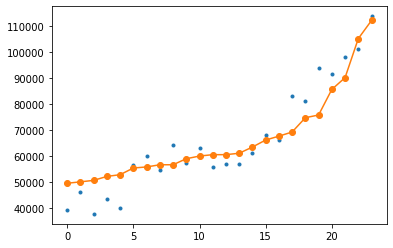

In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1, normalize=True)
ridge.fit(poly.fit_transform(x_train),y_train)
plt.plot(y_train, '.',ridge.predict(poly.fit_transform(x_train)),'-o')
plt.show()
ridge.predict(poly.transform(x_test))
r2score = r2_score(y_test,ridge.predict(poly.transform(x_test)))



**Eighth**
Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric 

In [0]:
def ridg_bst_alpha(x_train,x_test,y_train,y_test,alpha_list,degree):
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import sklearn 
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.metrics import r2_score
  from sklearn.linear_model import Ridge
  poly=PolynomialFeatures(degree=degree)
  x_train=poly.fit_transform(x_train)
  x_test=poly.fit_transform(x_test) 
  global alphas
  alphas={}
  for xalpha in alpha_list:
    ridge=Ridge(alpha= xalpha,normalize=True)
    ridge.fit(x_train,y_train)
    pred=ridge.predict(x_test)
    r_score = r2_score(y_test,pred)
    alphas[r_score]=xalpha
  bst_r_score= max(alphas.keys())
  bst_alpha= alphas[bst_r_score]
  print ('values of alpha are:',alphas)
  print('best r2 scaore is : ',bst_r_score)
  print ('best alpha is:',bst_alpha)
  return bst_r_score , bst_alpha , ridge , poly

In [0]:
ls=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridg_bst_alpha(x_poly,x_poly,y,y,ls,1)

values of alpha are: {0.9665546834956735: 1e-15, 0.9665546832935354: 1e-10, 0.9665527688987553: 1e-08, 0.9635906047584226: 0.0001, 0.9629627655982761: 0.001, 0.9620553159997847: 0.01, 0.8611734334606107: 1, 0.641663554154871: 5, 0.47011389103072854: 10, 0.30209191296036286: 20}
best r2 scaore is :  0.9665546834956735
best alpha is: 1e-15


(0.9665546834956735,
 1e-15,
 Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
       random_state=None, solver='auto', tol=0.001),
 PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                    order='C'))

**Ninth** : 


1.   Instantiate The Lasso Regressor with  Alpha = 1
2.   Fit and Transform the Training Features into Poly Training Features
3.   Fit the Lasso Model to the Poly Training Features and Actual Training Label
4.   Transfrom The Testing Features into Poly Testing Features
5.   Predict The Poly Testing Features
6.   Evaluate the Model by  R squared method between Preds and Actual Values
7.   Visualize The Model in a Good way 












/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139869737.47764617, tolerance: 1026733.8181833335
  positive)


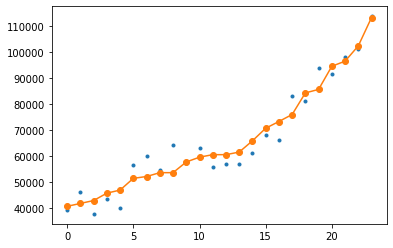

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1, normalize=True)
lasso.fit(poly.fit_transform(x_train),y_train)
plt.plot(y_train, '.',lasso.predict(poly.fit_transform(x_train)),'-o')
plt.show()
lasso.predict(poly.transform(x_test))
r2score = r2_score(y_test,lasso.predict(poly.transform(x_test)))

**Tenth**
- Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric 
- Print Out How many Features has been Selected 

In [0]:
def lasso_bst_alpha(x_train,x_test,y_train,y_test,alpha_list,degree):
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import sklearn 
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.metrics import r2_score
  from sklearn.linear_model import Lasso
  poly=PolynomialFeatures(degree=degree)
  x_train=poly.fit_transform(x_train)
  x_test=poly.fit_transform(x_test) 
  global alphas
  alphas={}
  for xalpha in alpha_list:
    lasso=Lasso(alpha= xalpha,normalize=True)
    lasso.fit(x_train,y_train)
    pred=lasso.predict(x_test)
    r_score = r2_score(y_test,pred)
    alphas[r_score]=xalpha
  bst_r_score= max(alphas.keys())
  bst_alpha= alphas[bst_r_score]
  print ('values of alpha are:',alphas)
  print('best r2 scaore is : ',bst_r_score)
  print ('best alpha is:',bst_alpha)
  return bst_r_score , bst_alpha , lasso , poly

In [0]:
ls=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lasso_bst_alpha(x_poly,x_poly,y,y,ls,13)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348703349.1168715, tolerance: 2179497.7852000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348703348.52164423, tolerance: 2179497.7852000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348703289.59380215, tolerance: 2179497.7852000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3481083

values of alpha were: {0.9680014954376404: 1e-15, 0.9680014954376365: 1e-10, 0.968001495437262: 1e-08, 0.9680014940917446: 0.0001, 0.9680016615554821: 0.001, 0.9680046585765852: 0.01, 0.9667055542573146: 1, 0.9656441865756904: 5, 0.9640034634234567: 10, 0.9616104914049809: 20}
best r2 scaore was :  0.9680046585765852
best alpha is: 0.01


(0.9680046585765852,
 0.01,
 PolynomialFeatures(degree=13, include_bias=True, interaction_only=False,
                    order='C'),
 Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
       positive=False, precompute=False, random_state=None, selection='cyclic',
       tol=0.0001, warm_start=False))

####**For Linear Regression ** 

In [0]:
def poly_lner_reg (x_train,x_test,y_train,y_test,degree):
  import numpy as np
  import pandas as pd
  import sklearn 
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.metrics import r2_score
  from sklearn.linear_model import LinearRegression
  poly_reg = PolynomialFeatures(degree = degree)
  x_train_poly = poly_reg.fit_transform(x_train)
  x_test_poly = poly_reg.transform(x_test)
  lin_reg = LinearRegression()
  lin_reg.fit(x_train_poly, y_train)
  pred=lin_reg.predict(x_test_poly)
  r_score = r2_score(y_test,pred)
  print('r2 scaore is : ',r_score)
  return r_score, lin_reg , poly_reg , pred

**Eleventh**

Here We come to the Final Step 
Make ONE BIG Function that when you call it would try all of the Regressors then Return the Name of the Regressor With the Highest R Squared 

# **Great Job**